In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pre_data = pd.read_csv("C:\\Users\\2019A00303\\Desktop\\Code\\Airbnb Project\\Data\\PreProcessingIreland.csv")
Pre_data

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
0,2134,2014-10-21,Ireland,53.344799,-6.267325,7.0,1.0,2.0,5.0,199.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,10
1,2135,2014-07-15,Ireland,53.340413,-6.234893,2.0,1.0,1.0,1.0,150.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,7
2,2136,2015-05-30,Ireland,53.313332,-6.249582,4.0,1.0,1.0,2.0,130.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,5
3,2137,2016-03-17,Ireland,53.352889,-6.286004,2.0,1.0,1.0,1.0,45.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,3
4,2139,2013-06-19,Ireland,53.339943,-6.305389,2.0,1.0,1.0,1.0,84.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5353,477990,2014-08-05,Ireland,53.342311,-6.268128,4.0,1.0,2.0,2.0,150.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,8
5354,477991,2016-07-27,Ireland,53.336161,-6.267771,1.0,1.0,1.0,1.0,75.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2,7
5355,477993,2016-03-03,Ireland,53.338845,-6.322914,6.0,1.5,3.0,5.0,150.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,3
5356,477995,2016-02-13,Ireland,53.394489,-6.168004,2.0,0.0,1.0,1.0,35.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5,2


<AxesSubplot:ylabel='Frequency'>

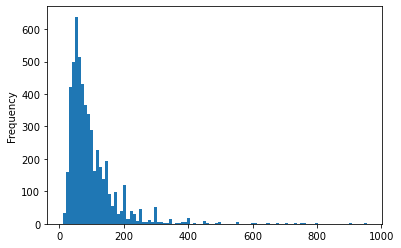

In [35]:
Pre_data['Price'].plot(kind='hist', bins=100)

In [36]:
Pre_data['group'] = pd.cut(x=Pre_data['Price'],
bins=[0, 50, 100, 150, 200, 1000],
labels=['group_1','group_2','group_3','group_4','group_5'])
Pre_data.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month,group
0,2134,2014-10-21,Ireland,53.344799,-6.267325,7.0,1.0,2.0,5.0,199.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,10,group_4
1,2135,2014-07-15,Ireland,53.340413,-6.234893,2.0,1.0,1.0,1.0,150.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,7,group_3
2,2136,2015-05-30,Ireland,53.313332,-6.249582,4.0,1.0,1.0,2.0,130.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5,5,group_3
3,2137,2016-03-17,Ireland,53.352889,-6.286004,2.0,1.0,1.0,1.0,45.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3,3,group_1
4,2139,2013-06-19,Ireland,53.339943,-6.305389,2.0,1.0,1.0,1.0,84.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,6,group_2


In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(Pre_data, Pre_data["group"]):
    train = Pre_data.loc[train_index]
    test = Pre_data.loc[test_index]

In [38]:
train['group'].value_counts() / len(train)

group_2    0.404340
group_1    0.281148
group_3    0.171255
group_4    0.078861
group_5    0.064396
Name: group, dtype: float64

In [39]:
test['group'].value_counts() / len(test)

group_2    0.403918
group_1    0.281716
group_3    0.170709
group_4    0.079291
group_5    0.064366
Name: group, dtype: float64

In [40]:
train.drop('group', axis=1, inplace=True)
train.head()

,Unnamed: 0,Host Since,Country,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,...,Entire home/apt,Private room,Shared room,Airbed,Couch,Futon,Pull-out Sofa,Real Bed,Day,Month
4421,400883,2013-07-17,Ireland,53.235568,-6.114816,2.0,1.0,1.0,2.0,69.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,7
2574,232827,2013-05-24,Ireland,53.349933,-6.242880,5.0,1.0,1.0,1.0,109.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4,5
5348,477979,2013-09-08,Ireland,53.346542,-6.284064,2.0,1.0,1.0,1.0,69.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,6,9
2532,232334,2015-02-18,Ireland,53.359006,-6.282791,4.0,1.0,2.0,4.0,119.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,2
2848,288543,2013-03-21,Ireland,53.365233,-6.220124,2.0,1.0,1.0,1.0,89.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,3


In [41]:
test.drop(['Unnamed: 0','group', 'Host Since', 'Country', 'Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
test.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
5346,53.349471,-6.240718,4.0,2.0,2.0,2.0,210.0,1.0,0.0,2.0,2.0,4.0,1.0,0.0,0.0,6,9
1778,53.327416,-6.227014,2.0,1.0,1.0,1.0,45.0,1.0,20.0,1.0,1125.0,30.0,0.0,1.0,0.0,0,7
3610,53.343569,-6.262913,4.0,1.0,1.0,4.0,120.0,1.0,0.0,2.0,1125.0,3.0,0.0,1.0,0.0,1,3
2725,53.376386,-6.277112,2.0,1.0,1.0,1.0,131.0,2.0,0.0,3.0,90.0,14.0,1.0,0.0,0.0,1,10
5188,53.326821,-6.231079,2.0,1.0,1.0,1.0,72.0,1.0,0.0,3.0,1125.0,1.0,0.0,1.0,0.0,0,5


In [42]:
train_y = train[['Price']]
train_y.head()

,Price
4421,69.0
2574,109.0
5348,69.0
2532,119.0
2848,89.0


In [43]:
train.drop(['Unnamed: 0', 'Price', 'Host Since', 'Country','Airbed', 'Couch', 'Futon', 'Pull-out Sofa', 'Real Bed', 'Cleaning Fee'], axis=1, inplace=True)
train_X = train
train_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
4421,53.235568,-6.114816,2.0,1.0,1.0,2.0,2.0,10.0,3.0,1125.0,10.0,1.0,0.0,0.0,2,7
2574,53.349933,-6.242880,5.0,1.0,1.0,1.0,1.0,30.0,2.0,16.0,11.0,1.0,0.0,0.0,4,5
5348,53.346542,-6.284064,2.0,1.0,1.0,1.0,2.0,0.0,2.0,14.0,31.0,0.0,1.0,0.0,6,9
2532,53.359006,-6.282791,4.0,1.0,2.0,4.0,4.0,25.0,2.0,30.0,99.0,1.0,0.0,0.0,2,2
2848,53.365233,-6.220124,2.0,1.0,1.0,1.0,1.0,0.0,2.0,1125.0,13.0,1.0,0.0,0.0,3,3


In [44]:
test_y= test[['Price']]
test_y.head()

,Price
5346,210.0
1778,45.0
3610,120.0
2725,131.0
5188,72.0


In [45]:
test.drop('Price', axis=1, inplace=True)
test_X = test
test_X.head()

,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Entire home/apt,Private room,Shared room,Day,Month
5346,53.349471,-6.240718,4.0,2.0,2.0,2.0,1.0,0.0,2.0,2.0,4.0,1.0,0.0,0.0,6,9
1778,53.327416,-6.227014,2.0,1.0,1.0,1.0,1.0,20.0,1.0,1125.0,30.0,0.0,1.0,0.0,0,7
3610,53.343569,-6.262913,4.0,1.0,1.0,4.0,1.0,0.0,2.0,1125.0,3.0,0.0,1.0,0.0,1,3
2725,53.376386,-6.277112,2.0,1.0,1.0,1.0,2.0,0.0,3.0,90.0,14.0,1.0,0.0,0.0,1,10
5188,53.326821,-6.231079,2.0,1.0,1.0,1.0,1.0,0.0,3.0,1125.0,1.0,0.0,1.0,0.0,0,5


In [46]:
# from sklearn.linear_model import LinearRegression

# l_reg = LinearRegression()
# l_reg.fit(train_X, train_y)

In [47]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import numpy as np

# predictions = l_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [48]:
# predictions = l_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [49]:
# from sklearn.tree import DecisionTreeRegressor

# d_reg = DecisionTreeRegressor()
# d_reg.fit(train_X, train_y)

In [50]:
# predictions = d_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [51]:
# predictions = d_reg.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [52]:
# from sklearn.svm import SVR

# svr = SVR()
# svr.fit(train_X, train_y)

In [53]:
# predictions = svr.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [54]:
# predictions = svr.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [55]:
# from sklearn.neighbors import KNeighborsRegressor
# knn = KNeighborsRegressor()
# knn.fit(train_X, train_y)

In [56]:
# predictions = knn.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [57]:
# predictions = knn.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [58]:
# from sklearn.neural_network import MLPRegressor

# ann = MLPRegressor()
# ann.fit(train_X, train_y)

In [59]:
# predictions = ann.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [60]:
# predictions = ann.predict(test_X)
# mse = mean_squared_error(test_y, predictions)
# mae = mean_absolute_error(test_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)

In [61]:
from sklearn.ensemble import RandomForestRegressor

r_reg = RandomForestRegressor()
r_reg.fit(train_X, train_y)

C:\Users\2019A0~1\AppData\Local\Temp/ipykernel_18228/806139679.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  r_reg.fit(train_X, train_y)


RandomForestRegressor()

Text(0.5, 0, 'Relative Importance')

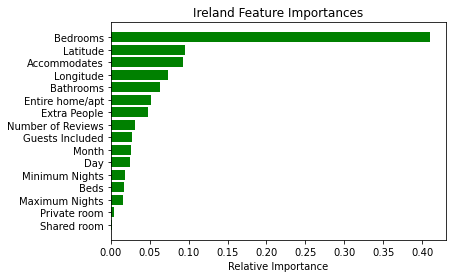

In [62]:
features = train_X.columns
importances = r_reg.feature_importances_
indices = np.argsort(importances)

plt.title('Ireland Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

In [63]:
predictions = r_reg.predict(train_X)
mse = mean_squared_error(train_y, predictions)
mae = mean_absolute_error(train_y, predictions)
rmse = np.sqrt(mse)
print(mse, rmse, mae)

281.4139617592161 16.7753975141937 9.15866308912739


In [64]:
# from sklearn.model_selection import GridSearchCV

# param = {'n_estimators' : [800,900,1000], 'max_features' : ['sqrt','auto','log2'], 'max_depth' : [8,9,10],
#          'min_samples_split': [2,3,4]}

# r_reg = RandomForestRegressor(random_state=42)

# search = GridSearchCV(r_reg, param, cv=5,
#                       scoring='neg_mean_absolute_error')
                      
# search.fit(train_X, train_y['Price'].ravel())

In [65]:
# from sklearn.ensemble import RandomForestRegressor

# r_reg = RandomForestRegressor(bootstrap=True,
#                               min_samples_split=2,
#                               criterion='mse',
#                               max_depth=None,
#                               max_features='auto',
#                               n_estimators=1000,
#                               random_state=42,
#                               )
# r_reg.fit(train_X, train_y['Price'].ravel())

In [66]:
# predictions = r_reg.predict(train_X)
# mse = mean_squared_error(train_y, predictions)
# mae = mean_absolute_error(train_y, predictions)
# rmse = np.sqrt(mse)
# print(mse, rmse, mae)